In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

ModuleNotFoundError: No module named 'mpl_toolkits'

In [23]:
# Load the dataset into a Pandas dataframe
df = pd.read_csv('hotel_reviews1.csv')


In [24]:
df.head()

id             dateAdded           dateUpdated  \
0  AVwc252WIN2L1WUfpqLP  2016-10-30T21:42:42Z  2018-09-10T21:06:27Z   
1  AVwc252WIN2L1WUfpqLP  2016-10-30T21:42:42Z  2018-09-10T21:06:27Z   
2  AVwc252WIN2L1WUfpqLP  2016-10-30T21:42:42Z  2018-09-10T21:06:27Z   
3  AVwdOclqIN2L1WUfti38  2015-11-28T19:19:35Z  2018-09-10T21:06:16Z   
4  AVwdOclqIN2L1WUfti38  2015-11-28T19:19:35Z  2018-09-10T21:06:16Z   

             address                                         categories  \
0  5921 Valencia Cir  Hotels,Hotels and motels,Hotel and motel reser...   
1  5921 Valencia Cir  Hotels,Hotels and motels,Hotel and motel reser...   
2  5921 Valencia Cir  Hotels,Hotels and motels,Hotel and motel reser...   
3     7520 Teague Rd  Hotels,Hotels and motels,Travel agencies and b...   
4     7520 Teague Rd  Hotels,Hotels and motels,Travel agencies and b...   

               primaryCategories             city country  \
0  Accommodation & Food Services  Rancho Santa Fe      US   
1  Accommodation & Food Services  Rancho Santa Fe      US   
2  Accommodation & Food Services  Rancho Santa Fe      US   
3  Accommodation & Food Services          Hanover      US   
4  Accommodation & Food Services          Hanover      US   

                                            keys   latitude  ...  \
0  us/ca/ranchosantafe/5921valenciacir/359754519  32.990959  ...   
1  us/ca/ranchosantafe/5921valenciacir/359754519  32.990959  ...   
2  us/ca/ranchosantafe/5921valenciacir/359754519  32.990959  ...   
3         us/md/hanover/7520teaguerd/-2043779672  39.155929  ...   
4         us/md/hanover/7520teaguerd/-2043779672  39.155929  ...   

                                    reviews.dateSeen reviews.rating  \
0  2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...            5.0   
1  2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...            5.0   
2  2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...            5.0   
3          2016-05-21T00:00:00Z,2016-07-31T00:00:00Z            2.0   
4                               2016-07-31T00:00:00Z            5.0   

                                  reviews.sourceURLs  \
0    https://www.hotels.com/hotel/125419/reviews%20/   
1    https://www.hotels.com/hotel/125419/reviews%20/   
2    https://www.hotels.com/hotel/125419/reviews%20/   
3  https://www.tripadvisor.com/Hotel_Review-g4118...   
4  https://www.tripadvisor.com/Hotel_Review-g4118...   

                                        reviews.text  \
0  Our experience at Rancho Valencia was absolute...   
1  Amazing place. Everyone was extremely warm and...   
2  We booked a 3 night stay at Rancho Valencia to...   
3  Currently in bed writing this for the past hr ...   
4  I live in Md and the Aloft is my Home away fro...   

                              reviews.title reviews.userCity  \
0           Best romantic vacation ever!!!!              NaN   
1                      Sweet sweet serenity              NaN   
2           Amazing Property and Experience              NaN   
3  Never again...beware, if you want sleep.         Richmond   
4                      ALWAYS GREAT STAY...           Laurel   

   reviews.userProvince reviews.username  \
0                   NaN            Paula   
1                   NaN                D   
2                   NaN              Ron   
3                    VA        jaeem2016   
4                    MD       MamaNiaOne   

                                          sourceURLs  \
0  http://www.hotels.com/ho125419/%25252525253Flo...   
1  http://www.hotels.com/ho125419/%25252525253Flo...   
2  http://www.hotels.com/ho125419/%25252525253Flo...   
3  http://www.yellowbook.com/profile/aloft-arunde...   
4  http://www.yellowbook.com/profile/aloft-arunde...   

                                            websites  
0                      http://www.ranchovalencia.com  
1                      http://www.ranchovalencia.com  
2                      http://www.ranchovalencia.com  
3  http://www.starwoodhotels.com/alofthotels/prop...  
4  h

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2657 entries, 3 to 9999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2657 non-null   object 
 1   dateAdded             2657 non-null   object 
 2   dateUpdated           2657 non-null   object 
 3   address               2657 non-null   object 
 4   categories            2657 non-null   object 
 5   primaryCategories     2657 non-null   object 
 6   city                  2657 non-null   object 
 7   country               2657 non-null   object 
 8   keys                  2657 non-null   object 
 9   latitude              2657 non-null   float64
 10  longitude             2657 non-null   float64
 11  name                  2657 non-null   object 
 12  postalCode            2657 non-null   object 
 13  province              2657 non-null   object 
 14  reviews.date          2657 non-null   object 
 15  reviews.dateSeen     

In [26]:
# Check for missing values
print(df.isnull().sum())


id                         0
dateAdded                  0
dateUpdated                0
address                    0
categories                 0
primaryCategories          0
city                       0
country                    0
keys                       0
latitude                   0
longitude                  0
name                       0
postalCode                 0
province                   0
reviews.date               0
reviews.dateSeen           0
reviews.rating             0
reviews.sourceURLs         0
reviews.text               1
reviews.title              1
reviews.userCity        5836
reviews.userProvince    7295
reviews.username           0
sourceURLs                 0
websites                   0
dtype: int64


In [27]:
# Check for duplicate rows
print(df.duplicated().sum())


0


In [28]:
# Step 3: Clean the data
df = df.drop_duplicates() # Remove duplicates
df = df.dropna() # Remove missing values


In [29]:
# Check for missing values
print(df.isnull().sum())

id                      0
dateAdded               0
dateUpdated             0
address                 0
categories              0
primaryCategories       0
city                    0
country                 0
keys                    0
latitude                0
longitude               0
name                    0
postalCode              0
province                0
reviews.date            0
reviews.dateSeen        0
reviews.rating          0
reviews.sourceURLs      0
reviews.text            0
reviews.title           0
reviews.userCity        0
reviews.userProvince    0
reviews.username        0
sourceURLs              0
websites                0
dtype: int64


In [31]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

# Now you can use word_tokenize function in your code


[nltk_data] Downloading package punkt to /home/steve/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [35]:
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/steve/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [38]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [43]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


In [ ]:



# Step 4: Tokenize the text
df['tokenized_text'] = df['reviews.text'].apply(lambda x: word_tokenize(x.lower()))

# Step 5: Remove stop words
stop_words = set(stopwords.words('english'))
df['filtered_text'] = df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])

# Step 6: Perform stemming or lemmatization
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
df['stemmed_text'] = df['filtered_text'].apply(lambda x: [stemmer.stem(word) for word in x])
df['lemmatized_text'] = df['filtered_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Step 7: Perform sentiment analysis
df['polarity_score'] = df['reviews.text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [46]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 15.0 kB/s eta 0:00:0031m14.5 kB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.1.1-cp311-cp311-linux_x86_64.whl size=406442 sha256=b8b9022a315157bc5f5bcf2e1c17bfcf3db0c16f499e70f0c6764d42ccec636a
  Stored in directory: /home/steve/.cache/pip/wheels/b7/14/d8/f10236cee8e25843111cceaa8aa6bbd35bfad15bdf576ed660
Successfully built wordcloud


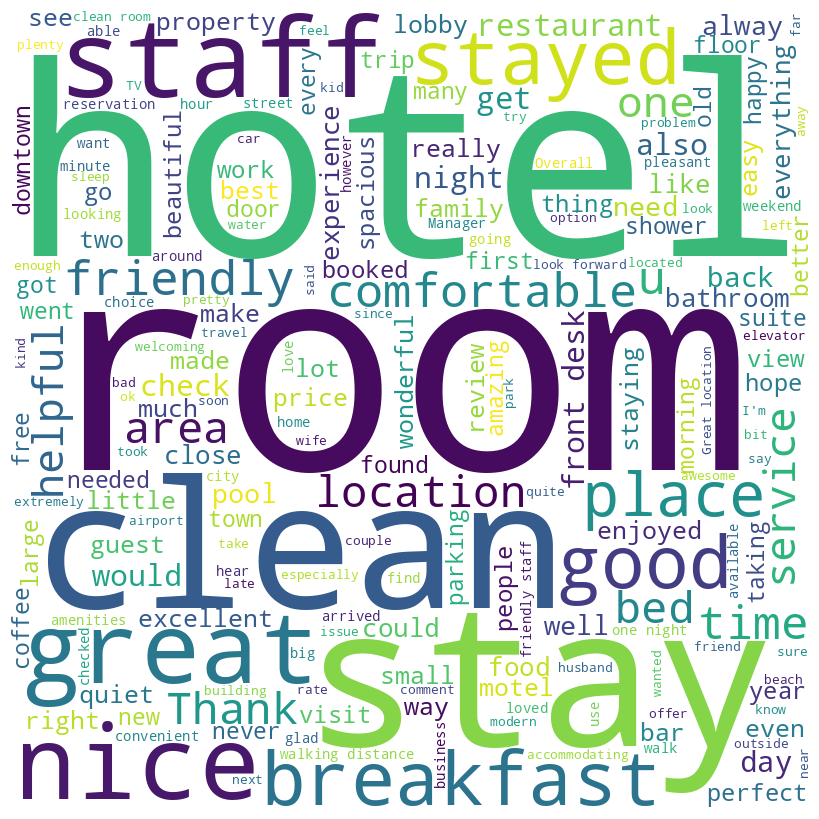

In [48]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Get all reviews as a single string
reviews = ' '.join(df['reviews.text'])

# Create a word cloud of the most common words in the reviews
wordcloud = WordCloud(width=800, height=800, 
                      background_color='white', 
                      stopwords=stop_words, 
                      min_font_size=10).generate(reviews)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.show()



In [55]:
!pip install textblob


Defaulting to user installation because normal site-packages is not writeable
  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [56]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline


In [57]:
#QUIZ ONE

#stop_words = set(stopwords.words('english'))

def tokenize_text(text):
    tokens = word_tokenize(text.lower())
    return [token for token in tokens if token not in stop_words and token.isalpha()]

df['tokens'] = df['reviews.text'].apply(tokenize_text)


In [58]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['reviews.text'].apply(get_sentiment)


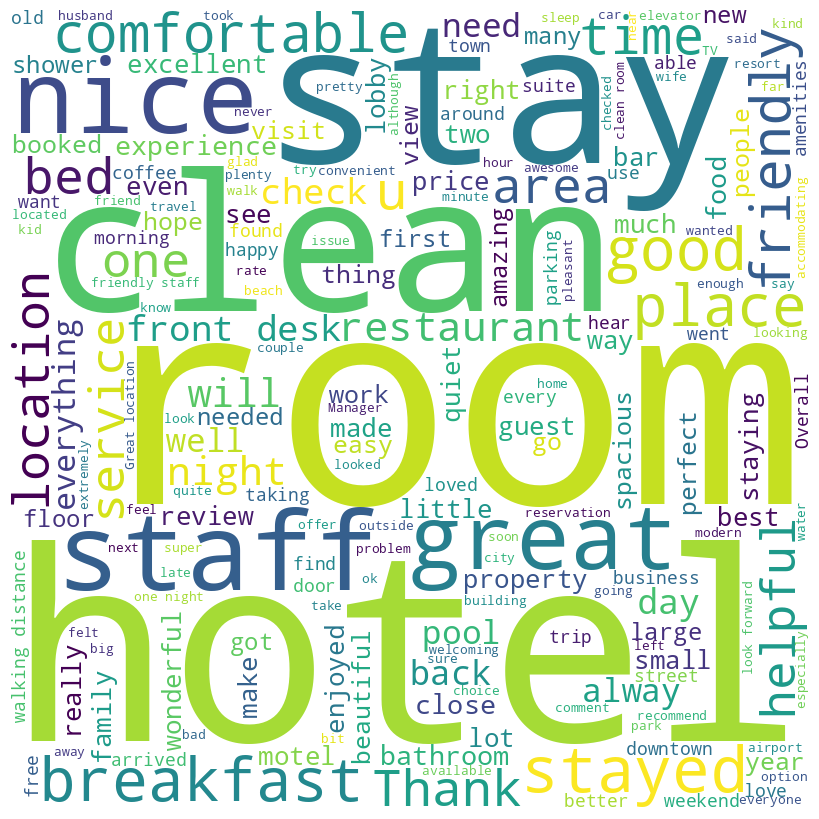

In [59]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(' '.join(df['reviews.text']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


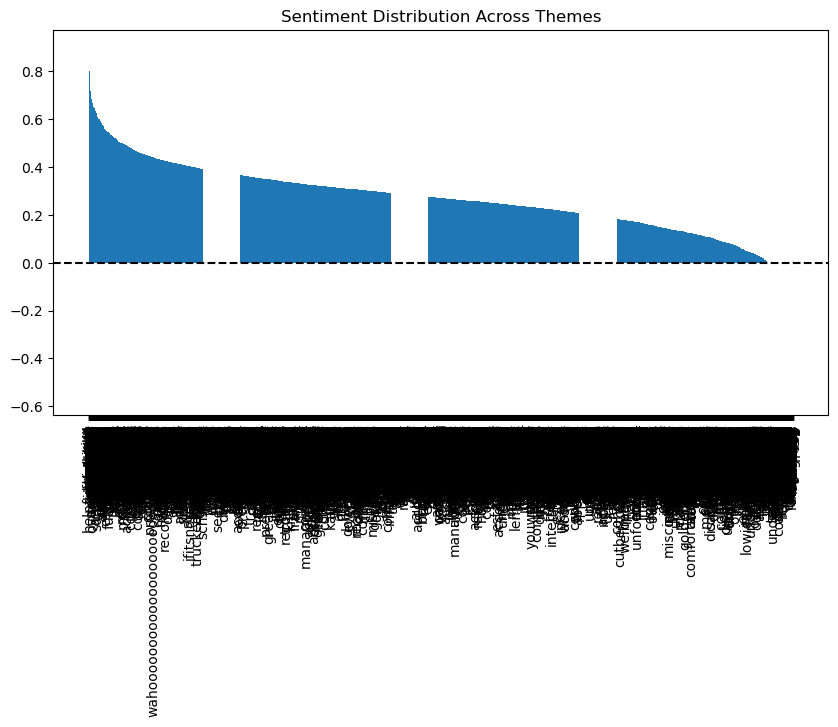

In [61]:
theme_sentiments = df.explode('tokens').groupby('tokens')['polarity'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(theme_sentiments.index, theme_sentiments)
ax.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=90)
plt.title('Sentiment Distribution Across Themes')
plt.show()


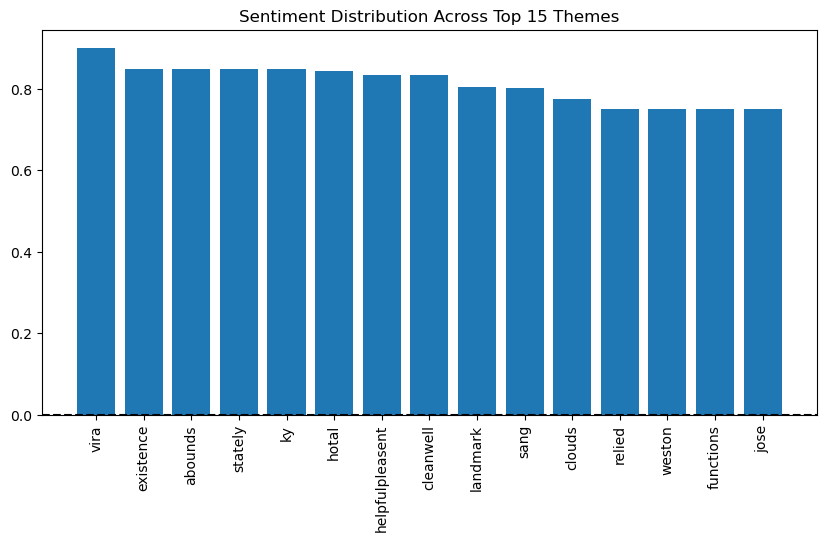

In [63]:
theme_sentiments = df.explode('tokens').groupby('tokens')['polarity'].mean().sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(theme_sentiments.index, theme_sentiments)
ax.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=90)
plt.title('Sentiment Distribution Across Top 15 Themes')
plt.show()


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2657 entries, 3 to 9999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2657 non-null   object 
 1   dateAdded             2657 non-null   object 
 2   dateUpdated           2657 non-null   object 
 3   address               2657 non-null   object 
 4   categories            2657 non-null   object 
 5   primaryCategories     2657 non-null   object 
 6   city                  2657 non-null   object 
 7   country               2657 non-null   object 
 8   keys                  2657 non-null   object 
 9   latitude              2657 non-null   float64
 10  longitude             2657 non-null   float64
 11  name                  2657 non-null   object 
 12  postalCode            2657 non-null   object 
 13  province              2657 non-null   object 
 14  reviews.date          2657 non-null   object 
 15  reviews.dateSeen     

In [70]:
#QUIZ 2


# Group the reviews by product version/model
grouped_reviews = df.groupby('categories')

# Perform sentiment analysis on each group
for name, group in grouped_reviews:
    sentiment_scores = group['reviews.text'].apply(lambda x: TextBlob(x).sentiment.polarity)
    mean_sentiment = sentiment_scores.mean()
    print(f"Product Version/Model: {name}, Mean Sentiment: {mean_sentiment}")


Product Version/Model: Airports,Hotels and motels,Hotel, Mean Sentiment: 0.4175271109362019
Product Version/Model: Airports,Hotels and motels,Hotel and motel reservations,Hotel,Hotels,Lodging,Travel and Tourism, Mean Sentiment: 0.30654761904761907
Product Version/Model: Apartments,Hotels and motels,Hotel and motel reservations,Hotels,Corporate Lodging,Lodging,Hotels Motels,Business Hotels,Family-Friendly Hotels,Weekend Getaway Hotels,Hotels & Motels,Hotel, Mean Sentiment: 0.3130927579365079
Product Version/Model: B&bs / Inns,Hotels and motels,Hotel, Mean Sentiment: 0.24958333333333335
Product Version/Model: Banquet facilities,Hotel and motel mgmt.,Hotels and motels,Restaurants,American restaurants,Hotels Motels,Lodging,Budget Hotels,Business Hotels,Family-friendly Hotels,Tourist Hotels,Luxury Hotels,Resorts,Hotel,Hotel, Hotel Bar, and Cocktail Bar Perimeter Center,Hotels, Mean Sentiment: 0.4248958333333334
Product Version/Model: Banquet facilities,Hotels and motels,Hotel and motel rese

Product Version/Model: Hotel,Hotels, Mean Sentiment: 0.3000700022526028
Product Version/Model: Hotel,Hotels & Motels,Budget Hotels,Business Hotels,Family-Friendly Hotels,Tourist Hotels,Attractions, Mean Sentiment: 0.16116071428571427
Product Version/Model: Hotel,Hotels & Motels,Conference & Convention Centers,Lodging,Beach Hotels,Budget Hotels,Business Hotels,Family-Friendly Hotels,Tourist Hotels,Weekend Getaway Hotels,Resorts,Hotel and Meeting Room Woodward Park, Mean Sentiment: 0.46124999999999994
Product Version/Model: Hotel,Hotels & Motels,Hotels and motels,Hotel and motel reservations,Hotels Motels,Alternative Fuels, Mean Sentiment: 0.390625
Product Version/Model: Hotel,Hotels And Motels, Mean Sentiment: 0.20298821548821547
Product Version/Model: Hotel,Hotels Motels, Mean Sentiment: 0.38596014999276224
Product Version/Model: Hotel,Hotels Motels,Budget Hotels,Family-friendly Hotels, Mean Sentiment: 0.3140740740740741
Product Version/Model: Hotel,Hotels Motels,Convention & Meeting F

Product Version/Model: Hotels Motels,Hotel, Mean Sentiment: 0.30755957508420223
Product Version/Model: Hotels Motels,Hotels & Motels,Bed and Breakfast,Hotel, Mean Sentiment: 0.45035964187327815
Product Version/Model: Hotels Motels,Hotels & Motels,Hotel, Mean Sentiment: 0.3378290887221369
Product Version/Model: Hotels and motels,Budget Hotels,Excavating contractors,Tourist Hotels,Hotels Motels,Family-friendly Hotels,Hotel,Business Hotels, Mean Sentiment: 0.20568518518518517
Product Version/Model: Hotels and motels,Budget Hotels,Hotels & Motels,Hotel, Mean Sentiment: 0.41795454545454547
Product Version/Model: Hotels and motels,Budget Hotels,Hotels Motels,Hotel, Mean Sentiment: 0.3733333333333333
Product Version/Model: Hotels and motels,Budget Hotels,Hotels Motels,Hotels & Motels,Hotel, Mean Sentiment: -0.21785714285714283
Product Version/Model: Hotels and motels,Budget Hotels,Lodging,Extended Stay,Family-Friendly Hotels,Weekend Getaway Hotels,Conference Room,Tourist Hotels,Meeting Room,H

Product Version/Model: Hotels and motels,Restaurants,Hotel, Mean Sentiment: 0.25962526594239554
Product Version/Model: Hotels and motels,Skiing equipment rental,Hotel, Mean Sentiment: 0.44149659863945573
Product Version/Model: Hotels and motels,Travel and Tourism,Hotel and motel mgmt.,Hotels Motels,Hotel, Mean Sentiment: 0.36854166666666666
Product Version/Model: Hotels,Apartments,Hotels and motels,Corporate housing,Hotel, Mean Sentiment: 0.3916666666666666
Product Version/Model: Hotels,Apartments,Hotels and motels,Hotel, Mean Sentiment: -0.1277777777777778
Product Version/Model: Hotels,Apartments,Hotels and motels,Hotel and motel reservations,Lodging,Motels,Hotel, Mean Sentiment: 0.5125000000000001
Product Version/Model: Hotels,B&bs / Inns,Hotels and motels,Hotel and motel reservations,Lodging,Hotels Motels,Motels,Hotel, Mean Sentiment: 0.0027678571428571552
Product Version/Model: Hotels,B&bs / Inns,Lodging,Motels,Hotel, Mean Sentiment: 0.1285714285714286
Product Version/Model: Hotels

Product Version/Model: Hotels,Lodging,Corporate Lodging,Hotel, Mean Sentiment: 0.3230248523976671
Product Version/Model: Hotels,Lodging,Corporate Lodging,Hotel and Hotel Pool,Hotel, Mean Sentiment: 0.1380952380952381
Product Version/Model: Hotels,Lodging,Corporate Lodging,Hotel,Hotels & Motels, Mean Sentiment: 0.46875
Product Version/Model: Hotels,Lodging,Corporate Lodging,Hotel,Hotels and motels,Hotel and motel reservations, Mean Sentiment: 0.2802202380952381
Product Version/Model: Hotels,Lodging,Corporate Lodging,Hotels & Motels,Hotel, Mean Sentiment: 0.30759259259259264
Product Version/Model: Hotels,Lodging,Corporate Lodging,Hotels Motels,Hotel, Mean Sentiment: -0.011060606060606082
Product Version/Model: Hotels,Lodging,Corporate Lodging,Hotels and motels,Hotel, Mean Sentiment: 0.34569080888247555
Product Version/Model: Hotels,Lodging,Corporate Lodging,Hotels and motels,Hotel and motel reservations,Hotel, Mean Sentiment: 0.21883838383838383
Product Version/Model: Hotels,Lodging,Corp

Product Version/Model: Hotels,Lodging,Motels,Hotels Motels,Hotel,Event Space,Hotel and Event Space Southwest, Mean Sentiment: 0.3589280575391686
Product Version/Model: Hotels,Lodging,Motels,Hotels Motels,Hotel,Hotel & Motel Consultants, Mean Sentiment: 0.31595643939393936
Product Version/Model: Hotels,Lodging,Motels,Hotels Motels,Hotel,Hotels & Motels, Mean Sentiment: 0.17450529100529102
Product Version/Model: Hotels,Lodging,Motels,Hotels Motels,Hotels & Motels,Hotel, Mean Sentiment: 0.677063492063492
Product Version/Model: Hotels,Lodging,Motels,Hotels Motels,Motel and Hotel,Hotels & Motels, Mean Sentiment: 0.32222222222222224
Product Version/Model: Hotels,Lodging,Motels,Hotels Motels,Travel and Tourism,Hotel, Mean Sentiment: 0.3720683020683021
Product Version/Model: Hotels,Lodging,Motels,Hotels and motels,Hotel, Mean Sentiment: 0.2716540404040404
Product Version/Model: Hotels,Lodging,Motels,Hotels and motels,Hotel and motel reservations,Hotel, Mean Sentiment: 0.5234457671957671
Produc

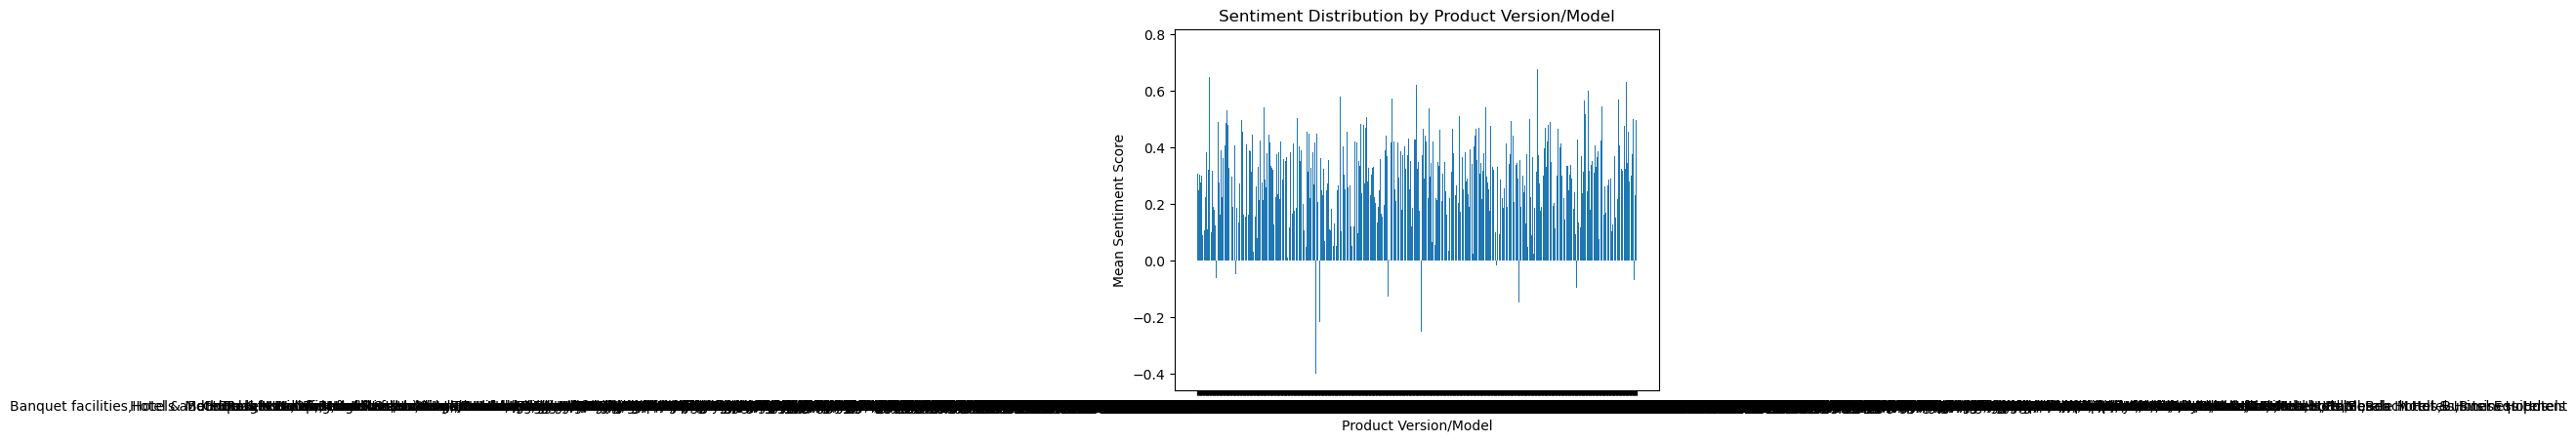

In [71]:
import matplotlib.pyplot as plt

# Group the reviews by product version/model
grouped_reviews = df.groupby('categories')

# Perform sentiment analysis on each group
sentiment_scores = []
for name, group in grouped_reviews:
    sentiment_scores.append(group['reviews.text'].apply(lambda x: TextBlob(x).sentiment.polarity).mean())

# Create a bar chart
plt.bar(grouped_reviews.groups.keys(), sentiment_scores)
plt.title('Sentiment Distribution by Product Version/Model')
plt.xlabel('Product Version/Model')
plt.ylabel('Mean Sentiment Score')
plt.show()


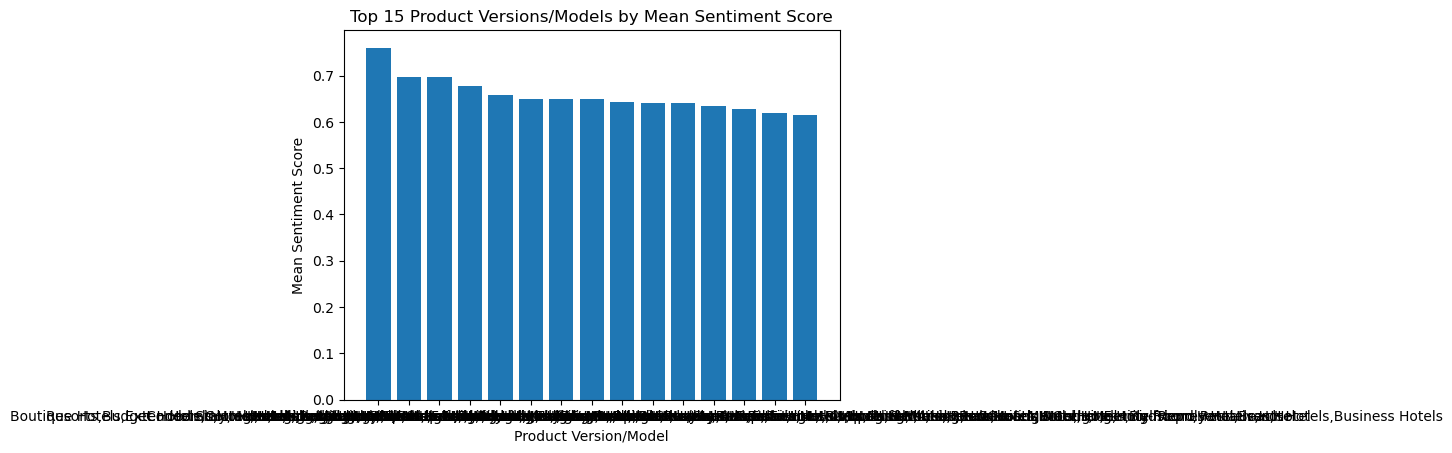

In [72]:
import matplotlib.pyplot as plt

# Group the reviews by product version/model
grouped_reviews = df.groupby('categories')

# Perform sentiment analysis on each group
sentiment_scores = []
for name, group in grouped_reviews:
    sentiment_scores.append(group['reviews.text'].apply(lambda x: TextBlob(x).sentiment.polarity).mean())

# Sort the sentiment scores in descending order and select the top 15
sorted_scores = sorted(zip(grouped_reviews.groups.keys(), sentiment_scores), key=lambda x: x[1], reverse=True)[:15]

# Create a bar chart
plt.bar([x[0] for x in sorted_scores], [x[1] for x in sorted_scores])
plt.title('Top 15 Product Versions/Models by Mean Sentiment Score')
plt.xlabel('Product Version/Model')
plt.ylabel('Mean Sentiment Score')
plt.show()


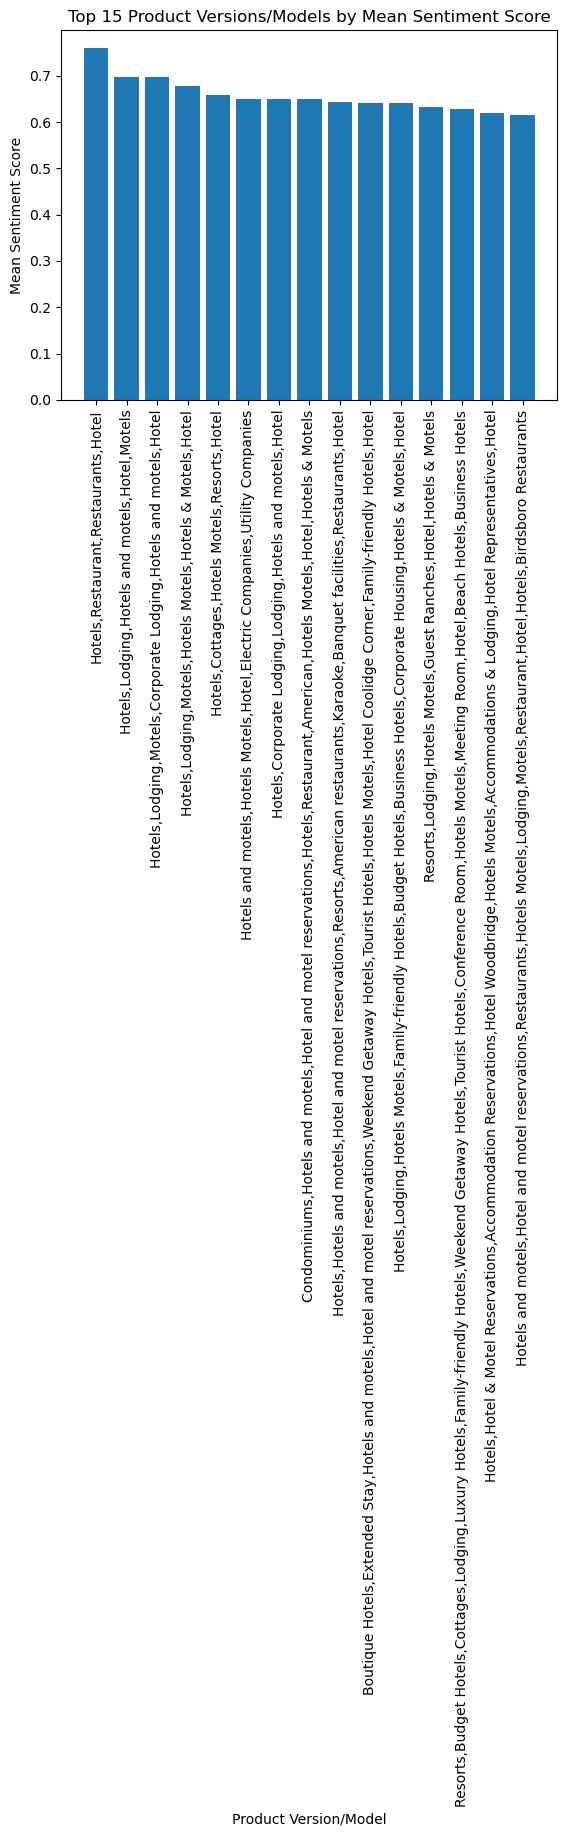

In [74]:
import matplotlib.pyplot as plt

# Group the reviews by product version/model
grouped_reviews = df.groupby('categories')

# Perform sentiment analysis on each group
sentiment_scores = []
for name, group in grouped_reviews:
    sentiment_scores.append(group['reviews.text'].apply(lambda x: TextBlob(x).sentiment.polarity).mean())

# Sort the sentiment scores in descending order and select the top 15
sorted_scores = sorted(zip(grouped_reviews.groups.keys(), sentiment_scores), key=lambda x: x[1], reverse=True)[:15]

# Create a bar chart
plt.bar([x[0] for x in sorted_scores], [x[1] for x in sorted_scores])
plt.title('Top 15 Product Versions/Models by Mean Sentiment Score')
plt.xlabel('Product Version/Model')
plt.ylabel('Mean Sentiment Score')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.show()


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2657 entries, 3 to 9999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2657 non-null   object 
 1   dateAdded             2657 non-null   object 
 2   dateUpdated           2657 non-null   object 
 3   address               2657 non-null   object 
 4   categories            2657 non-null   object 
 5   primaryCategories     2657 non-null   object 
 6   city                  2657 non-null   object 
 7   country               2657 non-null   object 
 8   keys                  2657 non-null   object 
 9   latitude              2657 non-null   float64
 10  longitude             2657 non-null   float64
 11  name                  2657 non-null   object 
 12  postalCode            2657 non-null   object 
 13  province              2657 non-null   object 
 14  reviews.date          2657 non-null   object 
 15  reviews.dateSeen     

In [ ]:
#QUIZ 3

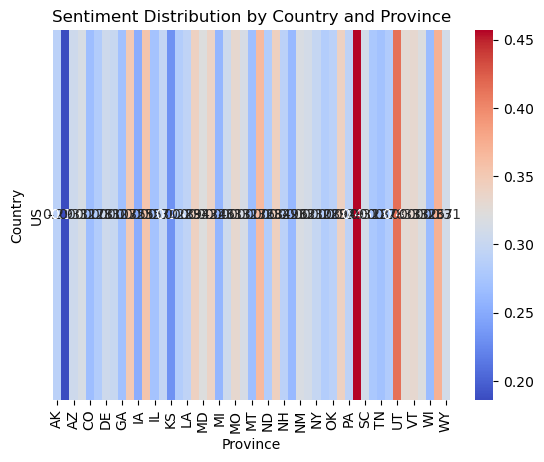

In [97]:
import seaborn as sns

# Group the reviews by demographic/geographic factors
grouped_reviews = df.groupby(['country', 'province'])

# Calculate the mean sentiment score for each group
sentiment_scores = grouped_reviews['polarity'].mean()

# Create a pivot table with countries as rows, provinces as columns, and sentiment scores as values
pivot_table = sentiment_scores.unstack()

# Create a heatmap to visualize the sentiment distribution
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Sentiment Distribution by Country and Province')
plt.xlabel('Province')
plt.ylabel('Country')
plt.show()


In [103]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 31.3 kB/s eta 0:00:00m eta 0:00:010:00:14


In [104]:
import plotly.express as px

# Group the reviews by country and calculate the mean sentiment score
grouped_reviews = df.groupby('country')['polarity'].mean()

# Create a choropleth map
fig = px.choropleth(locations=grouped_reviews.index,
                    locationmode='country names',
                    color=grouped_reviews.values,
                    title='Sentiment Distribution by Country',
                    labels={'color': 'Mean Sentiment Score'})
fig.show()


In [105]:
#QUIZ 4

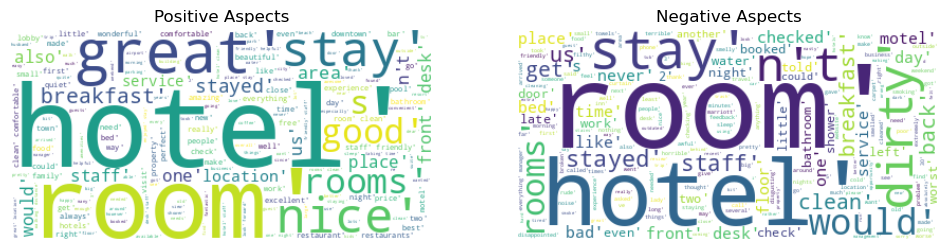

In [107]:
from wordcloud import WordCloud

# Join all the reviews text
reviews_text = " ".join(df['reviews.text'])

# Convert the filtered_text column to string
df['filtered_text'] = df['filtered_text'].astype(str)

# Create a WordCloud object for the positive and negative aspects
positive_cloud = WordCloud(background_color='white').generate(" ".join(df[df['polarity'] > 0]['filtered_text']))
negative_cloud = WordCloud(background_color='white').generate(" ".join(df[df['polarity'] < 0]['filtered_text']))

# Plot the positive and negative aspect word clouds
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(positive_cloud, interpolation='bilinear')
axes[0].set_title('Positive Aspects')
axes[0].axis('off')
axes[1].imshow(negative_cloud, interpolation='bilinear')
axes[1].set_title('Negative Aspects')
axes[1].axis('off')
plt.show()


In [ ]:
#QUIZ 5

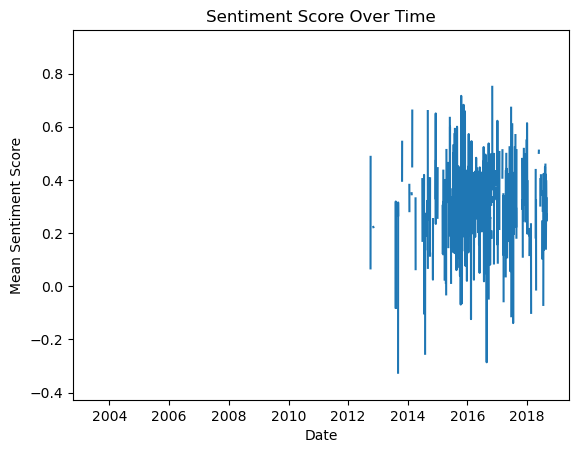

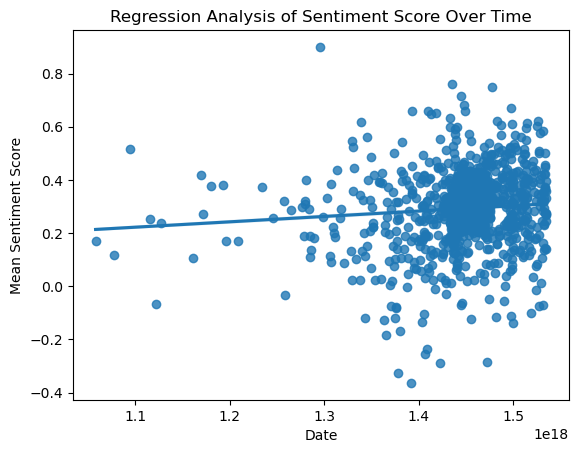

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Convert the date column to datetime format
df['reviews.date'] = pd.to_datetime(df['reviews.date'])

# Calculate the sentiment score for each review
df['sentiment_score'] = df['reviews.text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Group the reviews by date and calculate the mean sentiment score for each date
grouped_reviews = df.groupby(pd.Grouper(key='reviews.date', freq='D'))
mean_sentiment_scores = grouped_reviews['sentiment_score'].mean()

# Plot the sentiment score over time using a line chart
plt.plot(mean_sentiment_scores.index, mean_sentiment_scores.values)
plt.title('Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')
plt.show()

# Use regression analysis to identify any significant trends
sns.regplot(x=mean_sentiment_scores.index.astype('int64'), y=mean_sentiment_scores.values)
plt.title('Regression Analysis of Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')
plt.show()


In [ ]:
#QUIZ 6

In [111]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateSeen',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username',
       'sourceURLs', 'websites', 'tokenized_text', 'filtered_text',
       'stemmed_text', 'tokens', 'polarity', 'sentiment_score'],
      dtype='object')

Text(0.5, 1.0, 'Sentiment Distribution by Country')

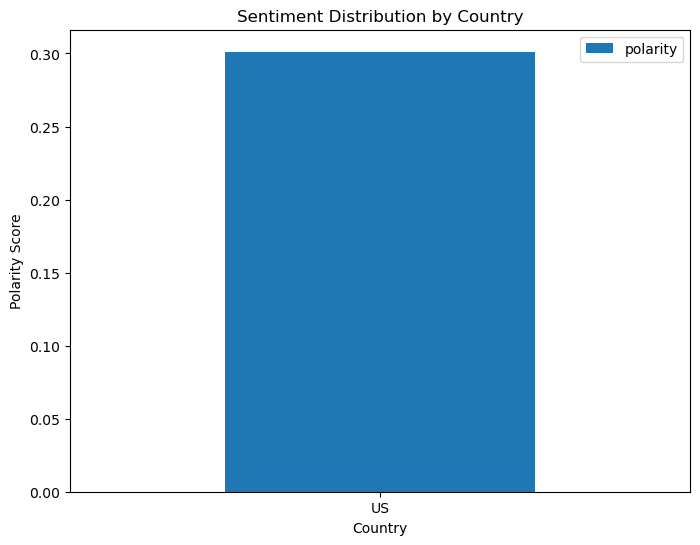

In [113]:
import pandas as pd
from textblob import TextBlob


# Perform sentiment analysis on each review and add the polarity score to a new column
df['polarity'] = df['reviews.text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Group the reviews by country and calculate the mean polarity score for each group
country_polarity = df.groupby('country')['polarity'].mean().reset_index()

# Plot a bar chart showing the sentiment distribution across different countries
ax = country_polarity.plot(kind='bar', x='country', y='polarity', figsize=(8,6), rot=0)
ax.set_xlabel('Country')
ax.set_ylabel('Polarity Score')
ax.set_title('Sentiment Distribution by Country')


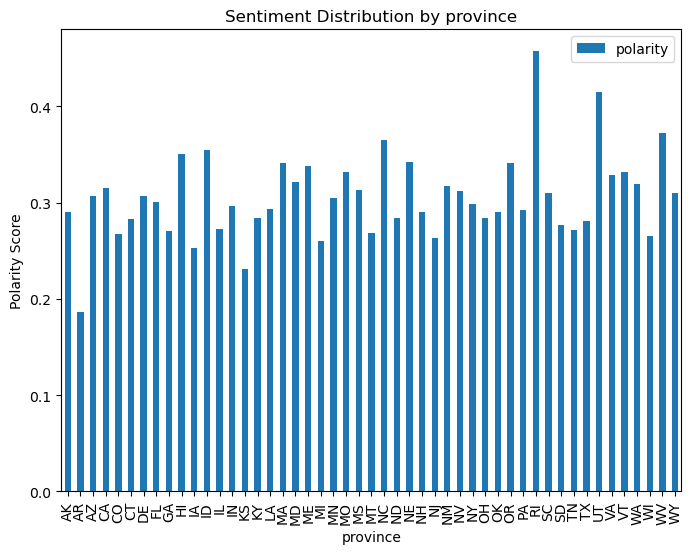

In [117]:
import pandas as pd
from textblob import TextBlob

# Perform sentiment analysis on each review and add the polarity score to a new column
df['polarity'] = df['reviews.text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Group the reviews by country and calculate the mean polarity score for each group
country_polarity = df.groupby('province')['polarity'].mean().reset_index()

# Plot a bar chart showing the sentiment distribution across different countries
ax = country_polarity.plot(kind='bar', x='province', y='polarity', figsize=(8,6), rot=0)
ax.set_xlabel('province')
ax.set_ylabel('Polarity Score')
ax.set_title('Sentiment Distribution by province')

# Rotate the x-axis tick labels to be vertical
ax.tick_params(axis='x', rotation=90)

plt.show()


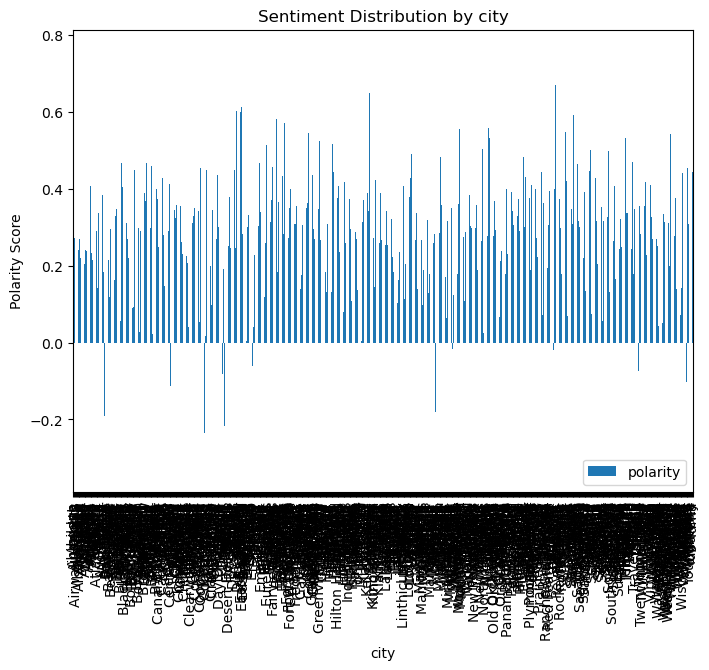

In [118]:
import pandas as pd
from textblob import TextBlob

# Perform sentiment analysis on each review and add the polarity score to a new column
df['polarity'] = df['reviews.text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Group the reviews by country and calculate the mean polarity score for each group
country_polarity = df.groupby('city')['polarity'].mean().reset_index()

# Plot a bar chart showing the sentiment distribution across different countries
ax = country_polarity.plot(kind='bar', x='city', y='polarity', figsize=(8,6), rot=0)
ax.set_xlabel('city')
ax.set_ylabel('Polarity Score')
ax.set_title('Sentiment Distribution by city')

# Rotate the x-axis tick labels to be vertical
ax.tick_params(axis='x', rotation=90)

plt.show()


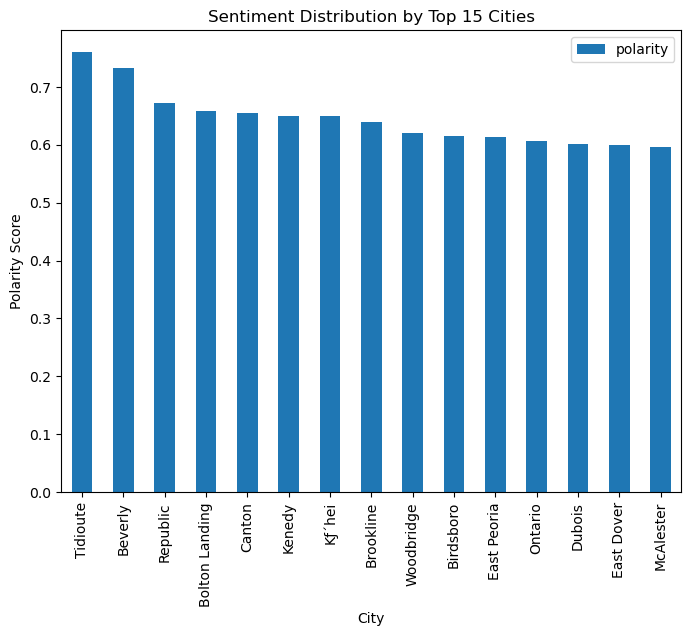

In [119]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Perform sentiment analysis on each review and add the polarity score to a new column
df['polarity'] = df['reviews.text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Group the reviews by city and calculate the mean polarity score for each group
city_polarity = df.groupby('city')['polarity'].mean().reset_index()

# Sort the cities by polarity score in descending order, select the top 15, and plot a bar chart
top_cities = city_polarity.sort_values('polarity', ascending=False).head(15)
ax = top_cities.plot(kind='bar', x='city', y='polarity', figsize=(8,6), rot=0)
ax.set_xlabel('City')
ax.set_ylabel('Polarity Score')
ax.set_title('Sentiment Distribution by Top 15 Cities')
ax.tick_params(axis='x', rotation=90)

plt.show()
